In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from pandas import DataFrame
import math
import scipy.integrate as integrate
!pip install git+https://github.com/bradkav/WIMpy_NREFT
from scipy.interpolate import interp1d

  Cloning https://github.com/bradkav/WIMpy_NREFT to /tmp/pip-req-build-d0rlgqvs
  Running command git clone -q https://github.com/bradkav/WIMpy_NREFT /tmp/pip-req-build-d0rlgqvs
  Created wheel for WIMpy: filename=WIMpy-1.0.0-cp37-none-any.whl size=63951 sha256=e9149c4136019c63f48a4bbcd84d2e6f3168d09851f3422d44e7ee138ccd7143
  Stored in directory: /tmp/pip-ephem-wheel-cache-74s6lntb/wheels/c7/67/fb/fb4eab67a4d03da1cde758605795c95dbe9bd06bbf62bb337b
Successfully built WIMpy


In [12]:
# Mount GoogleDrive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

'Anotações ML Blazar.gdoc'			    Paleodetectors
 Blazar_Classification.ipynb			    PaleoNeutrinos
 classificacao_roupas.ipynb			    Playground.ipynb
'Copy of Neural Networks Lab: Crash Course AI #5'   Quark_Stars
'Copy of Plot-Colors-Tool.ipynb'		    Quarks_Vari8-60-00.csv
 ML_Blazar					    SST_Blazar
'Neutrinos and Chaos'				   'Supernova Neutrinos'
 Notebook_03_03_20.ipynb			    Vari16-60-00.dat
 OneClass_SVM_50_resamples.csv			    Vari8-60-00.dat
 OneClass_SVM_50_resamples_v2.csv


#1.Cross Section - NC coherent
https://arxiv.org/abs/1608.01565

https://arxiv.org/abs/1906.05800

$$\frac{d \sigma}{dT} (E_\nu,T) = \frac{G_F^2}{8\pi} [Z(4\sin^2 \theta_{W}) + N]^2 M \left( 2 - \frac{MT}{E^2_\nu} \right) |f(q^2)|^2$$

*   T -> recoil energy
*   q -> transfered 4-momentum

Form factor (Helm nuclear form factor) from paledetectors paper

$$F(E_R) = f(q) = 3 \frac{\sin(qr_n) - qr_n\cos(qr_n)}{(qr_n)^3} e^{-(qs)^2/2}$$


*   Effective nuclear radius $r_n^2\approx c^2+\frac{7}{3} \pi^2 a^2 - 5s^2$, $a \approx 0.52 fm$, $c\approx (1.23Z^{1/3} -0.6)fm$, $s \approx 0.9 fm$



In [2]:
m_nucleon= 939.56536 #Nutron mass - MeV
MeV_to_inv_m = 5.06773*(10**12) # From MeV to m^-1
MeV_to_inv_fm = MeV_to_inv_m*(10**(-15)) # From MeV to fm^-1

def form_f2(T,Z,N): 
  A=Z+N
  M=A*m_nucleon
  q=np.sqrt(2*M*T) #MeV
  q=q*MeV_to_inv_fm #MeV -> fm^-1
  a=0.52 #fm
  s=0.9 #fm
  c=(1.23*(A**(1/3))-0.6) #fm
  r=np.sqrt(c**2+(7/3)*(np.pi**2)*(a**2)-5*(s**2))#fm
  qr=q*r
  qs=q*s
  #print(qr)
  form=3*((np.sin(qr)-qr*np.cos(qr))/(qr**3))*np.exp(-1*((qs)**2)/2)
  #print(form**2)
  return form**2


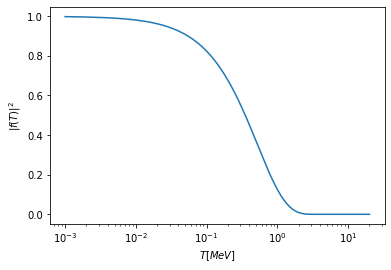

In [3]:
T_step=0.001
T_vec=np.arange(0.001, 20, T_step)#MeV

#for T in T_vec:
#  form_f(T,8,8)

plt.plot(T_vec,form_f2(T_vec,8,8))
plt.xlabel(r'$T[MeV]$')
plt.ylabel(r'$|f(T)|^2$')
plt.xscale('log')

In [4]:
G_F=1.16637*(10**(-11)) #MeV-²
MeV_to_inv_cm=5.06773*(10**10) #MeV -> cm^-1
inv_MeV2_to_cm2= MeV_to_inv_cm**(-2) #MeV^-2 -> cm^2 
sin2_W=0.23149

def CS_coherent(T,Enu,Z,N):
  A=Z+N
  M=A*m_nucleon
  Enu_min=np.sqrt(M*T/2)
  cs=0
  if Enu>Enu_min:
    cs=(G_F**2)*(1/(4*math.pi))*((Z*(4*sin2_W-1)+N)**2)*M*(1-(M*T/(2*(Enu**2))))*form_f2(T,Z,N) # MeV-2/MeV
    cs=cs*inv_MeV2_to_cm2 #MeV^-2 /MeV -> cm^2/MeV
  return cs 

0.13304023894622935 keV


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


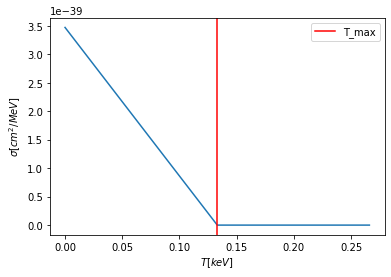

In [5]:
Z=8
N=8  
A=Z+N
M=A*m_nucleon
Enu=1
T_max=2*(Enu**2)/M
print(T_max*10**(3),"keV")

T_step=0.0001
T_vec=np.arange(0, 2*T_max*10**(3), T_step)#keV

CS_coherent_vec=np.vectorize(CS_coherent)

plt.plot(T_vec,CS_coherent_vec(T_vec*10**(-3),Enu,Z,N))
plt.axvline(x=T_max*10**(3), label='T_max',color='r')
#plt.plot(T_vec,CS_coherent_vec(T_vec*10**(-3),1,8,8))
plt.xlabel(r'$T[keV]$')
plt.ylabel(r'$\sigma [cm^2/MeV]$')
plt.legend()

In [6]:
import scipy.integrate as integrate
import scipy.special as special

Enu_vec=[1,2,5]
Z=8
N=8  
A=Z+N
M=A*m_nucleon

for Enu in Enu_vec:
  T_max=2*(Enu**2)/M
  print(T_max)
  print(integrate.quad(lambda T: CS_coherent_vec(T,Enu,Z,N), 0, 2*T_max), "cm^2 -> E_nu=",Enu,"MeV")

0.00013304023894622935
(2.312933820239681e-43, 2.5489470578119236e-57) cm^2 -> E_nu= 1 MeV
0.0005321609557849174
(9.249364692880846e-43, 1.0195788231247695e-56) cm^2 -> E_nu= 2 MeV
0.0033260059736557337
(5.770496503655677e-42, 6.372367644529809e-56) cm^2 -> E_nu= 5 MeV


In [7]:
def CS_coherent_tot(Enu,Z,N): #cm^2
  A=Z+N
  M=A*m_nucleon
  T_max=2*(Enu**2)/M
  cs_tot=integrate.quad(lambda T: CS_coherent_vec(T,Enu,Z,N), 0, 2*T_max)[0]
  return cs_tot  

def CS_coherent_tot_aprox(Enu,Z,N): #cm^2
  return 4.22*(10**(-45))*(N**2)*(Enu**2)

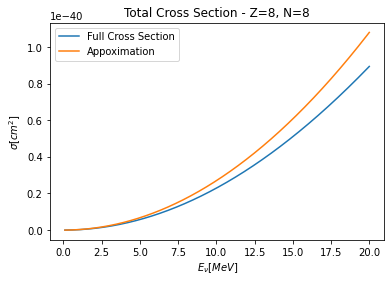

In [8]:
Z=8
N=8  

E_step=0.01
Enu_vec=np.arange(0.1, 20, E_step)# MeV

CS_coherent_tot_vec=np.vectorize(CS_coherent_tot)
CS_coherent_tot_aprox_vec=np.vectorize(CS_coherent_tot_aprox)

plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,Z,N),label='Full Cross Section')
plt.plot(Enu_vec,CS_coherent_tot_aprox_vec(Enu_vec,Z,N), label='Appoximation')
plt.xlabel(r'$E_\nu[MeV]$')
plt.ylabel(r'$\sigma [cm^2]$')
plt.title(r'Total Cross Section - Z=%d, N=%d'%(Z,N))
plt.legend()

In [9]:
#Quartz
def CS_coherent_SiO2_tot(Enu): #cm^2
  CS_O=CS_coherent_tot_vec(Enu,8,8)
  CS_Si=CS_coherent_tot_vec(Enu,14,14)
  CS=CS_Si+2*CS_O
  return CS

def CS_coherent_SiO2(T,Enu): #cm^2/MeV
  CS_O=CS_coherent(T,Enu,8,8)
  CS_Si=CS_coherent(T,Enu,14,14)
  CS=CS_Si+2*CS_O
  return CS

#Espsomite
def CS_coherent_MgSO4_7_H2O_tot(Enu): #cm^2
  CS_O=CS_coherent_tot_vec(Enu,8,8)
  CS_S=CS_coherent_tot_vec(Enu,16,16)
  CS_Mg=CS_coherent_tot_vec(Enu,12,12)
  CS_H=CS_coherent_tot_vec(Enu,1,1)
  CS= CS_Mg+CS_S+4*CS_O+7*(2*CS_H+CS_O)
  return CS

def CS_coherent_MgSO4_7_H2O(T,Enu): #cm^2
  CS_O=CS_coherent(T,Enu,8,8)
  CS_S=CS_coherent(T,Enu,16,16)
  CS_Mg=CS_coherent(T,Enu,12,12)
  CS_H=CS_coherent(T,Enu,1,1)
  CS= CS_Mg+CS_S+4*CS_O+7*(2*CS_H+CS_O)
  return CS

#EHalite
def CS_coherent_NaCl_tot(Enu): #cm^2
  CS_Na=CS_coherent_tot_vec(Enu,11,12)
  CS_Cl=CS_coherent_tot_vec(Enu,17,18)
  CS= CS_Na+CS_Cl
  return CS

def CS_coherent_NaCl(T,Enu): #cm^2
  CS_Na=CS_coherent(T,Enu,11,12)
  CS_Cl=CS_coherent(T,Enu,17,18)
  CS= CS_Na+CS_Cl
  return CS

To compare

https://indico.phys.vt.edu/event/34/contributions/658/attachments/505/591/NUFACT_CadedduM_COHERENT.pdf

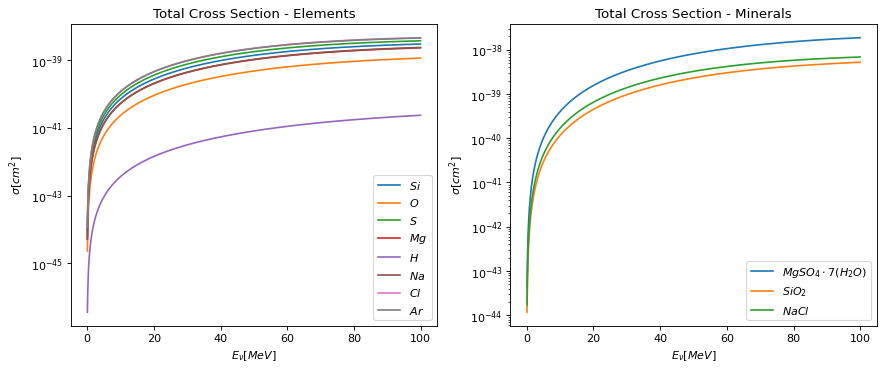

In [10]:
E_step=0.1
Enu_vec=np.arange(0.1, 100, E_step)# MeV

plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,14,14),label=r'$Si$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,8,8),label=r'$O$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,16,16),label=r'$S$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,12,12),label=r'$Mg$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,1,1),label=r'$H$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,11,12),label=r'$Na$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,17,18),label=r'$Cl$')
plt.plot(Enu_vec,CS_coherent_tot_vec(Enu_vec,18,18),label=r'$Ar$')
plt.xlabel(r'$E_\nu[MeV]$')
plt.ylabel(r'$\sigma [cm^2]$')
plt.title(r'Total Cross Section - Elements')
plt.yscale('log')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Enu_vec,CS_coherent_MgSO4_7_H2O_tot(Enu_vec),label=r'$MgSO_4\cdot7(H_2O)$')
plt.plot(Enu_vec,CS_coherent_SiO2_tot(Enu_vec),label=r'$SiO_2$')
plt.plot(Enu_vec,CS_coherent_NaCl_tot(Enu_vec),label=r'$NaCl$')
plt.xlabel(r'$E_\nu[MeV]$')
plt.ylabel(r'$\sigma [cm^2]$')
plt.title(r'Total Cross Section - Minerals')
plt.yscale('log')
plt.legend()

0.13304023894622935 keV


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


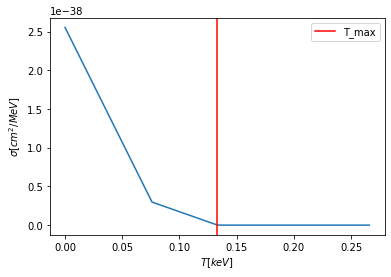

In [11]:
Enu=1
T_max=2*(Enu**2)/M
print(T_max*10**(3),"keV")

T_step=0.0001
T_vec=np.arange(0, 2*T_max*10**(3), T_step)#keV

CS_coherent_SiO2_vec=np.vectorize(CS_coherent_SiO2)

plt.plot(T_vec,CS_coherent_SiO2_vec(T_vec*10**(-3),Enu))
plt.axvline(x=T_max*10**(3), label='T_max',color='r')
plt.xlabel(r'$T[keV]$')
plt.ylabel(r'$\sigma [cm^2/MeV]$')
plt.legend()

#2.Antineutrino Reactor Spectrum

*   Angra antineutino showed in [The CONNIE experiment - CONNIE Collaboration](https://arxiv.org/abs/1608.01565)

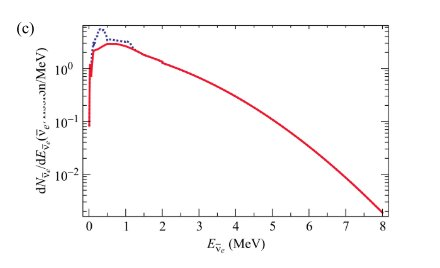

**About the Reactor Antineutrino Spectrum**

A good **review** on reactor antineutrinos, with a section about the spctrum, can be found in: https://www.annualreviews.org/doi/full/10.1146/annurev-nucl-101916-123318

Basically there is two **methods** to obtain the reactor antineutrino spectrum:


1.   **Inversion of $\beta$ spectrum:** transform a measured electron $\beta$ spectrum in a the neutrino spectrum. Uncertanties about 2%-7%.
2.   **Ab into calculations:** summation of the spectrum from all possible decay branches based on nuclear databases. Uncertanties about 10%.

For most of the works that uses the 1st method, the measured $\beta$ spectrum came from the ILL experiment (ref). 






The main two **models** for the ractor antineutrino spectrum are ($E_\nu>2MeV$):


1.   **ILL-Vogel model (Old):** Uses the inversion of $\beta$ spectrum measured at the ILL experiment for $^{235}\textrm{U}$,$^{239}\textrm{Pu}$ and $^{241}\textrm{Pu}$ istopes (main ones). The
$^{238}\textrm{U}$ contribution was obtained using *ab into* calculations by [P. Vogel](https://journals.aps.org/prc/abstract/10.1103/PhysRevC.24.1543).

2.   **Huber–Mueller model (New):** Higher accuracy $\beta$ inversion done by [P. Huber](https://arxiv.org/abs/1106.0687), considering higer order corrections, for the ILL  data ($^{235}\textrm{U}$,$^{239}\textrm{Pu}$ and $^{241}\textrm{Pu}$) - Uncertanty $\sim 2.4%$. A better *ab into* calculation for the $^{238}\textrm{U}$ was 
done by [Th. A. Muller](https://arxiv.org/abs/1101.2663).

All works cited above are made form $E_\nu>2MeV$,which is the interested regime for most reactor neutrinos experiments, given the inverse beta (IB) deacy threshold due to positron mass.

Results of *ab into* calculations for $E_\nu< 2MeV$ was done by [P.Vogel](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.39.3378). However, the paper does not explain clearly how it arrives in the given results as it does not give the uncertanties.


**From P. Huber:https://arxiv.org/abs/1106.0687**

In [13]:
!ls "/content/drive/My Drive/Colab Notebooks/PaleoNeutrinos/Códigos"

Paleodetectors_Angra_Dedin.ipynb     Recoil_Spectrum
Paleodetectors_Angra.ipynb	     U235-anti-neutrino-flux-250keV.csv
Pu239-anti-neutrino-flux-250keV.csv  U238-anti-neutrino-flux-Muller.csv
Pu241-anti-neutrino-flux-250keV.csv


In [14]:
file="/content/drive/My Drive/Colab Notebooks/PaleoNeutrinos/Códigos/Pu239-anti-neutrino-flux-250keV.csv"
data_Pu239 = pd.read_csv(file)
file="/content/drive/My Drive/Colab Notebooks/PaleoNeutrinos/Códigos/Pu241-anti-neutrino-flux-250keV.csv"
data_Pu241 = pd.read_csv(file)
file="/content/drive/My Drive/Colab Notebooks/PaleoNeutrinos/Códigos/U235-anti-neutrino-flux-250keV.csv"
data_U235 = pd.read_csv(file)

#Energy bins
E_P_Huber=data_Pu239.loc[:,'energy [MeV]'].values
#Pu239
Nu_Pu239_P_Huber=data_Pu239.loc[:,'neutrinos[MeV^-1 fission^-1] '].values
Nu_Pu239_P_Huber_error=[]
Nu_Pu239_P_Huber_error.append(np.absolute(data_Pu239.loc[:,'neg total error'].values)*Nu_Pu239_P_Huber)
Nu_Pu239_P_Huber_error.append(np.absolute(data_Pu239.loc[:,'pos total error'].values)*Nu_Pu239_P_Huber)
#Pu241
Nu_Pu241_P_Huber=data_Pu241.loc[:,'neutrinos[MeV^-1 fission^-1] '].values
Nu_Pu241_P_Huber_error=[]
Nu_Pu241_P_Huber_error.append(np.absolute(data_Pu241.loc[:,'neg total error'].values)*Nu_Pu241_P_Huber)
Nu_Pu241_P_Huber_error.append(np.absolute(data_Pu241.loc[:,'pos total error'].values)*Nu_Pu241_P_Huber)
#U235
Nu_U235_P_Huber=data_U235.loc[:,'neutrinos[MeV^-1 fission^-1] '] .values
Nu_U235_P_Huber_error=[]
Nu_U235_P_Huber_error.append(np.absolute(data_U235.loc[:,'neg total error'].values)*Nu_U235_P_Huber)
Nu_U235_P_Huber_error.append(np.absolute(data_U235.loc[:,'pos total error'].values)*Nu_U235_P_Huber)

data_Pu239.columns

Index(['energy [MeV]', 'neutrinos[MeV^-1 fission^-1] ', 'neg stat. error',
       'pos stat. Error', 'neg bias error', 'pos bias error', 'Z error',
       'Z error.1', 'WM error', 'WM error.1', 'norm error', 'norm error.1',
       'neg total error', 'pos total error'],
      dtype='object')

**From Th. A.Muller, et.al: https://arxiv.org/abs/1101.2663v3**

In [15]:
file="/content/drive/My Drive/Colab Notebooks/PaleoNeutrinos/Códigos/U238-anti-neutrino-flux-Muller.csv"
data_U238 = pd.read_csv(file)
data_U238.columns

#Energy bins
E_Muller=data_U238.loc[:,'Kinetic_E(MeV)'].values
#U238
Nu_U238_Muller=data_U238.loc[:,'N_nu_bar_e(/fission/MeV)-450d'].values

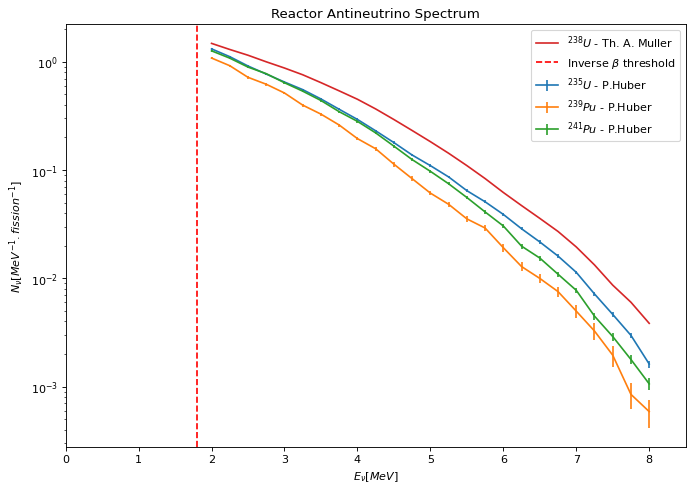

In [16]:
plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.errorbar(E_P_Huber,Nu_U235_P_Huber,Nu_U235_P_Huber_error,label=r'$^{235}U$ - P.Huber')
plt.errorbar(E_P_Huber,Nu_Pu239_P_Huber,Nu_Pu239_P_Huber_error,label=r'$^{239}Pu$ - P.Huber')
plt.errorbar(E_P_Huber,Nu_Pu241_P_Huber,Nu_Pu241_P_Huber_error,label=r'$^{241}Pu$ - P.Huber')
plt.plot(E_Muller,Nu_U238_Muller,label=r'$^{238}U$ - Th. A. Muller')
plt.axvline(1.8, ls='--',c='r', label=r'Inverse $\beta$ threshold')
plt.title("Reactor Antineutrino Spectrum")
plt.xlabel(r'$E_\nu[MeV]$')
plt.ylabel(r'$N_\nu [MeV^{-1}. fission^{-1}]$')
plt.yscale('log')
plt.xlim([0, 8.5])
plt.legend()

In [17]:
U_235_more_2MeV_interpol = interp1d(E_P_Huber, Nu_U235_P_Huber, kind='cubic') #interpolation
Pu_239_more_2MeV_interpol = interp1d(E_P_Huber, Nu_Pu239_P_Huber, kind='cubic') #interpolation
U_238_more_2MeV_interpol = interp1d(E_P_Huber, Nu_U238_Muller, kind='cubic') #interpolation
Pu_241_more_2MeV_interpol = interp1d(E_P_Huber, Nu_Pu241_P_Huber, kind='cubic') #interpolation

**From P. Vogel**

In [18]:
E_less_2MeV= [2,1.5,1,0.75,0.5,0.25,0.125,6.25e-2, 3.12e-2, 1.563e-2, 7.813e-3,0]
U_235_less_2MeV=[1.26,1.69,2.41,2.66,2.66,2.16,1.98,0.61,0.35,0.092,0.024,0]
U_235_less_2MeV_interpol = interp1d(E_less_2MeV, U_235_less_2MeV, kind='cubic') #interpolation

Pu_239_less_2MeV=[1.08, 1.48, 2.32, 2.58, 2.63, 2.08, 1.99, 0.64, 2.13, 0.56, 0.14,0]
Pu_239_less_2MeV_interpol = interp1d(E_less_2MeV, Pu_239_less_2MeV, kind='cubic') #interpolation

U_238_less_2MeV=[1.5, 1.97, 2.75, 2.96, 2.91, 2.18, 2.02, 0.65, 1.32, 0.35, 0.089,0]
U_238_less_2MeV_interpol = interp1d(E_less_2MeV, U_238_less_2MeV, kind='cubic') #interpolation

Pu_241_less_2MeV=[1.32, 1.75, 2.63, 2.9, 2.82, 2.14, 1.85, 0.59, 3, 0.79, 0.2,0]
Pu_241_less_2MeV_interpol = interp1d(E_less_2MeV, Pu_241_less_2MeV, kind='cubic') #interpolation

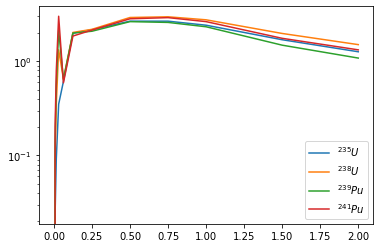

In [19]:
plt.plot(E_less_2MeV,U_235_less_2MeV,label=r'$^{235}U$')
plt.plot(E_less_2MeV,U_238_less_2MeV,label=r'$^{238}U$')
plt.plot(E_less_2MeV,Pu_239_less_2MeV,label=r'$^{239}Pu$')
plt.plot(E_less_2MeV,Pu_241_less_2MeV,label=r'$^{241}Pu$')
plt.yscale('log')
plt.legend()

**All together**

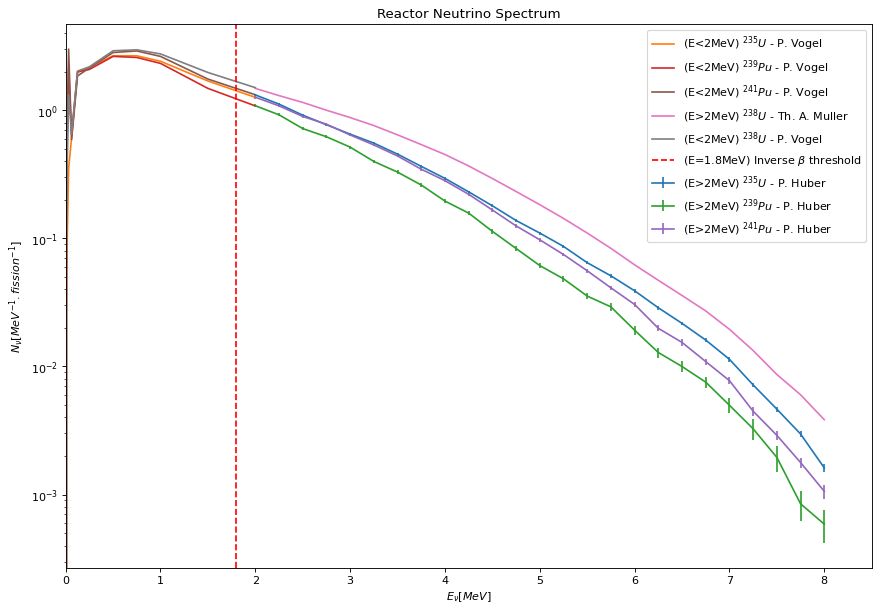

In [20]:
plt.figure(figsize=(13, 9), dpi= 80, facecolor='w', edgecolor='k')
#U235
plt.errorbar(E_P_Huber,Nu_U235_P_Huber,Nu_U235_P_Huber_error,label=r'(E>2MeV) $^{235}U$ - P. Huber')
plt.plot(E_less_2MeV,U_235_less_2MeV,label=r'(E<2MeV) $^{235}U$ - P. Vogel')
#Pu239
plt.errorbar(E_P_Huber,Nu_Pu239_P_Huber,Nu_Pu239_P_Huber_error,label=r'(E>2MeV) $ ^{239}Pu$ - P. Huber')
plt.plot(E_less_2MeV,Pu_239_less_2MeV,label=r'(E<2MeV) $^{239}Pu$ - P. Vogel')
#Pu241
plt.errorbar(E_P_Huber,Nu_Pu241_P_Huber,Nu_Pu241_P_Huber_error,label=r'(E>2MeV) $^{241}Pu$ - P. Huber')
plt.plot(E_less_2MeV,Pu_241_less_2MeV,label=r'(E<2MeV) $^{241}Pu$ - P. Vogel')
#U238
plt.plot(E_Muller,Nu_U238_Muller,label=r'(E>2MeV) $^{238}U$ - Th. A. Muller')
plt.plot(E_less_2MeV,U_238_less_2MeV,label=r'(E<2MeV) $^{238}U$ - P. Vogel')
#IB decay threshold
plt.axvline(1.8, ls='--',c='r', label=r'(E=1.8MeV) Inverse $\beta$ threshold')
plt.title("Reactor Neutrino Spectrum")
plt.xlabel(r'$E_\nu[MeV]$')
plt.ylabel(r'$N_\nu [MeV^{-1}. fission^{-1}]$')
plt.yscale('log')
plt.xlim([0, 8.5])
plt.legend()

In [21]:
def dN_dE_Muller_Huber_Vogel(E,element):
  if element=='U235':
    if E<=2.0:
      return U_235_less_2MeV_interpol(E)
    else:
     return U_235_more_2MeV_interpol(E)

  if element=='U238':
    if E<=2.0:
      return U_238_less_2MeV_interpol(E)
    else:
     return U_238_more_2MeV_interpol(E)
     
  if element=='Pu239':
    if E<=2.0:
      return Pu_239_less_2MeV_interpol(E)
    else:
     return Pu_239_more_2MeV_interpol(E)

  if element=='Pu241':
    if E<=2.0:
      return Pu_241_less_2MeV_interpol(E)
    else:
     return Pu_241_more_2MeV_interpol(E)

dN_dE_Muller_Huber_Vogel_vec=np.vectorize(dN_dE_Muller_Huber_Vogel)

def dN_dE_Muller_Huber_Vogel_tot(E):
  U_235=dN_dE_Muller_Huber_Vogel_vec(E,'U235')
  U_238=dN_dE_Muller_Huber_Vogel_vec(E,'U238')
  Pu_239=dN_dE_Muller_Huber_Vogel_vec(E,'Pu239')
  Pu_241=dN_dE_Muller_Huber_Vogel_vec(E,'Pu241')
  #print(U_235,U_238,Pu_239,Pu_241)
  dN_dE=(0.56*U_235)+(0.08*U_238)+(0.30*Pu_239)+(0.06*Pu_241)
  return dN_dE

dN_dE_Muller_Huber_Vogel_tot_vec=np.vectorize(dN_dE_Muller_Huber_Vogel_tot)

Norm_Muller_Huber_Vogel=integrate.quad(lambda E: dN_dE_Muller_Huber_Vogel_tot(E), 0, 8)
print("Normalization constant (Muller-Huber-Vogel):",Norm_Muller_Huber_Vogel)

Normalization constant (Muller-Huber-Vogel): (5.6019524208089315, 6.890775865351204e-08)


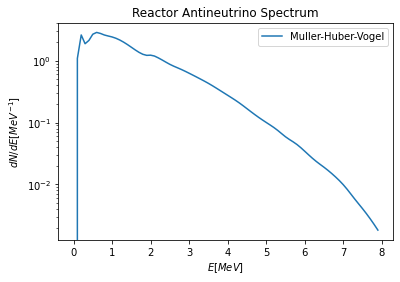

In [22]:
E_step=0.1
Enu_vec=np.arange(0, 8, E_step)# MeV

plt.plot(Enu_vec,dN_dE_Muller_Huber_Vogel_tot(Enu_vec),label='Muller-Huber-Vogel')
plt.xlabel(r'$E[MeV]$')
plt.ylabel(r'$dN/dE [MeV^{-1}]$')
plt.title(r'Reactor Antineutrino Spectrum')
plt.yscale('log')
plt.legend()

**Parametrization**

In [23]:
def dN_dE_Moroni_more_2MeV(E,a0,a1,a2):
  dN_dE=np.exp(a0+a1*E+a2*(E**2))
  return dN_dE

def dN_dE_Moroni(E,element):
  if element=='U235':
    if E<=2.0:
      return U_235_less_2MeV_interpol(E)
    else:
     return dN_dE_Moroni_more_2MeV(E,1.26,-0.16,-0.091)

  if element=='U238':
    if E<=2.0:
      return U_238_less_2MeV_interpol(E)
    else:
     return dN_dE_Moroni_more_2MeV(E,1.5,-0.162,-0.079)
     
  if element=='Pu239':
    if E<=2.0:
      return Pu_239_less_2MeV_interpol(E)
    else:
     return dN_dE_Moroni_more_2MeV(E,1.08,-0.239,-0.0981)

  if element=='Pu241':
    if E<=2.0:
      return Pu_241_less_2MeV_interpol(E)
    else:
     return dN_dE_Moroni_more_2MeV(E,1.32,-0.08,-0.1085)
dN_dE_Moroni_vec=np.vectorize(dN_dE_Moroni)

def dN_dE_Moroni_tot(E):
  U_235=dN_dE_Moroni_vec(E,'U235')
  U_238=dN_dE_Moroni_vec(E,'U238')
  Pu_239=dN_dE_Moroni_vec(E,'Pu239')
  Pu_241=dN_dE_Moroni_vec(E,'Pu241')
  dN_dE=(0.56*U_235)+(0.08*U_238)+(0.30*Pu_239)+(0.06*Pu_241)
  return dN_dE

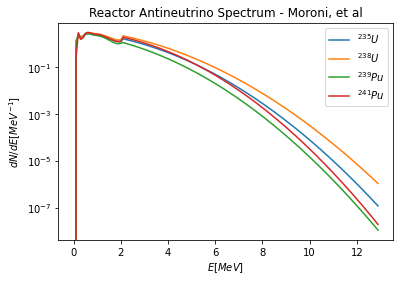

In [24]:
E_step=0.1
Enu_vec=np.arange(0, 13, E_step)# MeV

plt.plot(Enu_vec,dN_dE_Moroni_vec(Enu_vec,'U235'),label=r'$^{235}U$')
plt.plot(Enu_vec,dN_dE_Moroni_vec(Enu_vec,'U238'),label=r'$^{238}U$')
plt.plot(Enu_vec,dN_dE_Moroni_vec(Enu_vec,'Pu239'),label=r'$^{239}Pu$')
plt.plot(Enu_vec,dN_dE_Moroni_vec(Enu_vec,'Pu241'),label=r'$^{241}Pu$')
plt.xlabel(r'$E[MeV]$')
plt.ylabel(r'$dN/dE [MeV^{-1}]$')
plt.title(r'Reactor Antineutrino Spectrum - Moroni, et al')
plt.yscale('log')
plt.legend()

In [25]:
Norm_Moroni=integrate.quad(lambda E: dN_dE_Moroni_tot(E), 0, 50)
print("Normalization constant (Moroni,et al.):",Norm_Moroni)

Normalization constant (Moroni,et al.): (6.253998512320519, 7.948717684058693e-08)


**P.Huber vs G. Moroni**

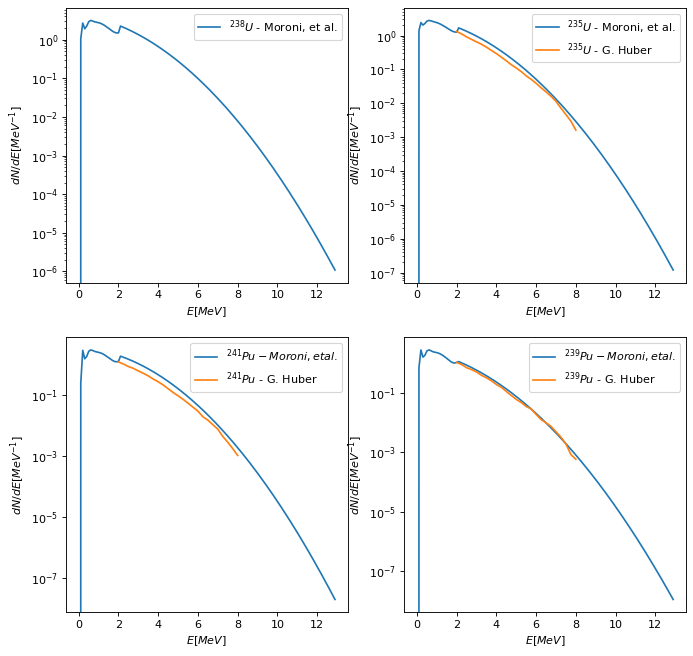

In [26]:
E_step=0.1
Enu_vec=np.arange(0, 13, E_step)# MeV

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2,2,1)
plt.plot(Enu_vec,dN_dE_Moroni_vec(Enu_vec,'U238'),label=r'$^{238}U$ - Moroni, et al.')
plt.xlabel(r'$E[MeV]$')
plt.ylabel(r'$dN/dE [MeV^{-1}]$')
plt.yscale('log')
plt.legend()

plt.subplot(2,2,2)
plt.plot(Enu_vec,dN_dE_Moroni_vec(Enu_vec,'U235'),label=r'$^{235}U$ - Moroni, et al.')
plt.plot(E_P_Huber,Nu_U235_P_Huber,label=r'$^{235}U$ - G. Huber')
plt.xlabel(r'$E[MeV]$')
plt.ylabel(r'$dN/dE [MeV^{-1}]$')
plt.yscale('log')
plt.legend()

plt.subplot(2,2,3)
plt.plot(Enu_vec,dN_dE_Moroni_vec(Enu_vec,'Pu241'),label=r'$^{241}Pu - Moroni, et al.$')
plt.plot(E_P_Huber,Nu_Pu241_P_Huber,label=r'$^{241}Pu$ - G. Huber')
plt.xlabel(r'$E[MeV]$')
plt.ylabel(r'$dN/dE [MeV^{-1}]$')
plt.yscale('log')
plt.legend()

plt.subplot(2,2,4)
plt.plot(Enu_vec,dN_dE_Moroni_vec(Enu_vec,'Pu239'),label=r'$^{239}Pu - Moroni, et al.$')
plt.plot(E_P_Huber,Nu_Pu239_P_Huber,label=r'$^{239}Pu$ - G. Huber')
plt.xlabel(r'$E[MeV]$')
plt.ylabel(r'$dN/dE [MeV^{-1}]$')
plt.yscale('log')
plt.legend()

**Total Spectrum**

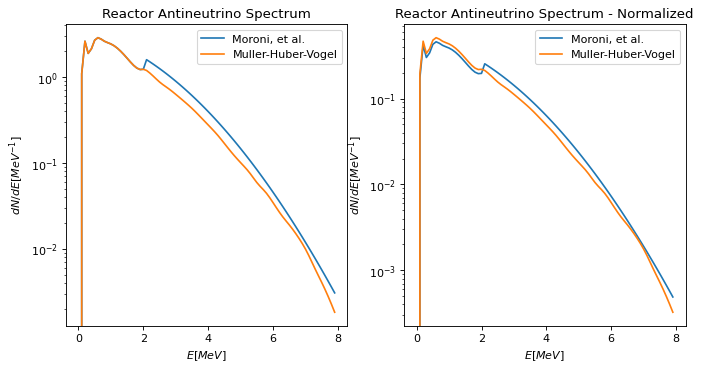

In [27]:
E_step=0.1
Enu_vec=np.arange(0, 8, E_step)# MeV

plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.plot(Enu_vec,dN_dE_Moroni_tot(Enu_vec),label='Moroni, et al.')
plt.plot(Enu_vec,dN_dE_Muller_Huber_Vogel_tot(Enu_vec),label='Muller-Huber-Vogel')
plt.xlabel(r'$E[MeV]$')
plt.ylabel(r'$dN/dE [MeV^{-1}]$')
plt.title(r'Reactor Antineutrino Spectrum')
plt.yscale('log')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Enu_vec,dN_dE_Moroni_tot(Enu_vec)*(1/Norm_Moroni[0]),label='Moroni, et al.')
plt.plot(Enu_vec,dN_dE_Muller_Huber_Vogel_tot(Enu_vec)*(1/Norm_Muller_Huber_Vogel[0]),label='Muller-Huber-Vogel')
plt.xlabel(r'$E[MeV]$')
plt.ylabel(r'$dN/dE [MeV^{-1}]$')
plt.title(r'Reactor Antineutrino Spectrum - Normalized')
plt.yscale('log')
plt.legend()

##2.1. Antineutrino flux at the detector

In [28]:
def Flux_Moroni(Enu): #E[MeV]
  D=30*10**2 #cm
  N_rate= 8.7*10**20# Neutrino rate of production (s⁻¹) from CONNIE https://arxiv.org/abs/1608.01565
  Flux=(1/(4*math.pi*D**2))*N_rate*(dN_dE_Moroni_tot(Enu)/Norm_Moroni[0])#cm⁻².s⁻¹.MeV⁻¹
  return Flux 

def Flux_Muller_Huber_Vogel(Enu): #E[MeV]
  D=30*10**2 #cm
  N_rate= 8.7*10**20# Neutrino rate of production (s⁻¹) from CONNIE https://arxiv.org/abs/1608.01565
  Flux=(1/(4*math.pi*D**2))*N_rate*(dN_dE_Muller_Huber_Vogel_tot(Enu)/Norm_Muller_Huber_Vogel[0])#cm⁻².s⁻¹.MeV⁻¹
  return Flux 


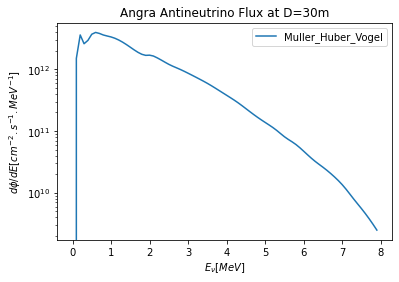

In [29]:
plt.plot(Enu_vec,Flux_Muller_Huber_Vogel(Enu_vec),label='Muller_Huber_Vogel')
plt.xlabel(r'$E_\nu[MeV]$')
plt.ylabel(r'$d\phi/dE [cm^{-2}.s^{-1}.MeV^{-1}]$')
plt.title(r'Angra Antineutrino Flux at D=30m')
plt.yscale('log')
plt.legend()

# 3.Recoil Spectrum


##3.2. Recoil Spectrum per mineral

In [30]:
SiO2_molar_mass=60.07 #g/mol
MgSO4_7_H2O_molar_mass= 246.4746 #g/mol
NaCl_molar_mass=58.433 #g/mol

def Event_rate(Enu,T,mineral):
  if mineral =='SiO2':
    R_per_target=CS_coherent_SiO2(T,Enu)*Flux_Muller_Huber_Vogel(Enu)  #s⁻¹MeV⁻²
    n_targets_density= (6.02*10**23)/SiO2_molar_mass #SiO2 targets/g
    R=n_targets_density*R_per_target#s⁻¹MeV⁻²g⁻¹
    return R
  if mineral =='MgSO4_7_H2O':
    R_per_target=CS_coherent_MgSO4_7_H2O(T,Enu)*Flux_Muller_Huber_Vogel(Enu)  #s⁻¹MeV⁻²
    n_targets_density= (6.02*10**23)/MgSO4_7_H2O_molar_mass #MgSO4 targets/g
    R=n_targets_density*R_per_target#s⁻¹MeV⁻²g⁻¹
    return R
  if mineral =='NaCl':
    R_per_target=CS_coherent_NaCl(T,Enu)*Flux_Muller_Huber_Vogel(Enu)  #s⁻¹MeV⁻²
    n_targets_density= (6.02*10**23)/NaCl_molar_mass #MgSO4 targets/g
    R=n_targets_density*R_per_target#s⁻¹MeV⁻²g⁻¹
    return R

def Recoil_spectrum(T,mineral):
  Recoil=integrate.quad(lambda Enu: Event_rate(Enu,T,mineral),0,8,epsabs=1.49e-20) #s⁻¹MeV⁻¹g⁻¹
  #print(Recoil)
  return Recoil #s⁻¹MeV⁻¹g⁻¹


In [31]:
T_step=0.0001
T_vec = np.logspace(-2, 1.3, 100, endpoint=True)#keV

R_Si02=[]
R_Si02_error=[]
R_MgSO4_7_H2O=[]
R_MgSO4_7_H2O_error=[]
R_NaCl=[]
R_NaCl_error=[]

for T in T_vec:
  R_aux,R_error_aux = Recoil_spectrum(T*10**(-3),'SiO2') # T in MeV
  R_Si02.append(R_aux)
  R_Si02_error.append(R_error_aux)
  R_aux,R_error_aux = Recoil_spectrum(T*10**(-3),'MgSO4_7_H2O') # T in MeV
  R_MgSO4_7_H2O.append(R_aux)
  R_MgSO4_7_H2O_error.append(R_error_aux)
  R_aux,R_error_aux = Recoil_spectrum(T*10**(-3),'NaCl') # T in MeV
  R_NaCl.append(R_aux)
  R_NaCl_error.append(R_error_aux)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


KeyboardInterrupt: ignored

In [ ]:
plt.errorbar(T_vec,R_Si02,yerr=R_Si02_error,label='$SiO_2$')
plt.errorbar(T_vec,R_MgSO4_7_H2O,yerr=R_MgSO4_7_H2O_error,label=r'$MgSO_4 \cdot 7(H_2O)$')
plt.errorbar(T_vec,R_NaCl,yerr=R_NaCl_error,label=r'$NaCl$')
plt.xlabel(r'$T[keV]$')
plt.ylabel(r'Event Rate (T) $[s⁻¹.MeV⁻¹.g⁻¹)]$')
plt.title("Recoil Espctrum R(T)")
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [ ]:
len(T_vec)

100

In [ ]:
#Event Rate
Enu_max=8
T_max=2*(Enu_max**2)/M
T_max=T_max*10**(3) #keV
Event_rate = integrate.quad(lambda T: Recoil_spectrum(T*10**(-3),'MgSO4_7_H2O')[0],0,4*T_max) #s⁻¹g

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


In [ ]:
Event_rate

(0.00034628073507965705, 3.180244515577776e-09)

In [ ]:
Event_rate_per_day=Event_rate[0]*3600*24
print("Event rate [g⁻¹.day⁻¹]:",Event_rate_per_day)

Event rate [g⁻¹.day⁻¹]: 26.104735405588237


##3.2. Recoil Spectrum per atom

In [ ]:
def Event_rate_atom(Enu,T,atom):
  if atom =='Si':
    R_per_target=CS_coherent(T,Enu,14,14)*Flux_Muller_Huber_Vogel(Enu)  #s⁻¹MeV⁻²
    R=(6.02*10**23)*R_per_target#s⁻¹MeV⁻²mol⁻¹
    return R

  elif atom =='O':
    R_per_target=CS_coherent(T,Enu,8,8)*Flux_Muller_Huber_Vogel(Enu)  #s⁻¹MeV⁻²
    R=(6.02*10**23)*R_per_target#s⁻¹MeV⁻²mol⁻¹
    return R

  elif atom =='S':
    R_per_target=CS_coherent(T,Enu,16,16)*Flux_Muller_Huber_Vogel(Enu)  #s⁻¹MeV⁻²
    R=(6.02*10**23)*R_per_target#s⁻¹MeV⁻²mol⁻¹
    return R

  elif atom =='Mg':
    R_per_target=CS_coherent(T,Enu,12,12)*Flux_Muller_Huber_Vogel(Enu)  #s⁻¹MeV⁻²
    R=(6.02*10**23)*R_per_target#s⁻¹MeV⁻²mol⁻¹
    return R

  elif atom =='H':
    R_per_target=CS_coherent(T,Enu,1,1)*Flux_Muller_Huber_Vogel(Enu)  #s⁻¹MeV⁻²
    R=(6.02*10**23)*R_per_target#s⁻¹MeV⁻²mol⁻¹
    return R

  elif atom =='Na':
    R_per_target=CS_coherent(T,Enu,11,12)*Flux_Muller_Huber_Vogel(Enu)  #s⁻¹MeV⁻²
    R=(6.02*10**23)*R_per_target#s⁻¹MeV⁻²mol⁻¹
    return R
  elif atom =='Cl':
    R_per_target=CS_coherent(T,Enu,17,18)*Flux_Muller_Huber_Vogel(Enu)  #s⁻¹MeV⁻²
    R=(6.02*10**23)*R_per_target#s⁻¹MeV⁻²mol⁻¹
    return R

  else:
    print("Invalid atom!")
    return 0
     

def Recoil_spectrum_atom(T,atom):
  Recoil=integrate.quad(lambda Enu: Event_rate_atom(Enu,T,atom),0,8,epsabs=1.49e-20) #s⁻¹MeV⁻¹g⁻¹
  #print(Recoil)
  return Recoil #s⁻¹MeV⁻¹mol⁻¹


In [ ]:
T_vec_lin = np.linspace(0.001,30,200) #keV
T_vec_log = np.logspace(-2, 1.3, 100, endpoint=True)#keV

atoms=["Si","O","S","Mg","H","Na","Cl"]
R_atom_lin=[]
R_atom_log=[]
R_atom_lin_error=[]
R_atom_log_error=[]

for i in range(len(atoms)):
  R_atom_lin.append([])
  R_atom_log.append([])
  R_atom_lin_error.append([])
  R_atom_log_error.append([])
  for T in T_vec_lin:
    R_aux,R_error_aux = Recoil_spectrum_atom(T*10**(-3),atoms[i]) # T in MeV
    R_atom_lin[i].append(R_aux)
    R_atom_lin_error[i].append(R_error_aux)

  for T in T_vec_log:
    R_aux,R_error_aux = Recoil_spectrum_atom(T*10**(-3),atoms[i]) # T in MeV
    R_atom_log[i].append(R_aux)
    R_atom_log_error[i].append(R_error_aux)

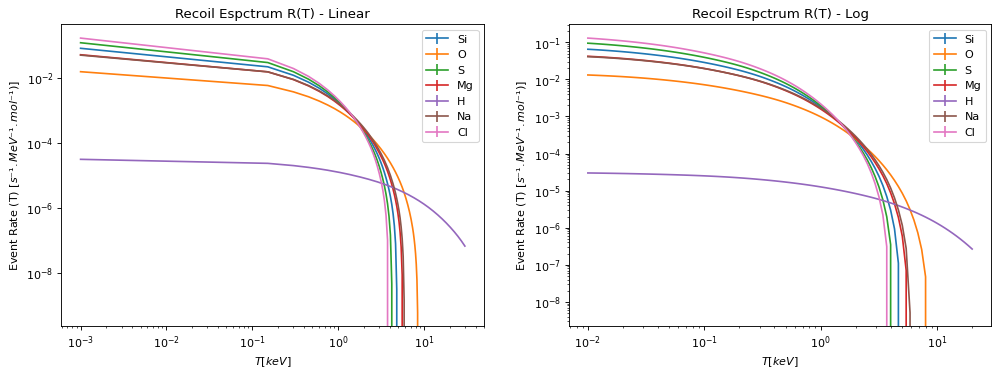

In [ ]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
for i in range(len(atoms)):
  plt.errorbar(T_vec_lin,R_atom_lin[i],yerr=R_atom_lin_error[i],label='%s'%(atoms[i]))
plt.xlabel(r'$T[keV]$')
plt.ylabel(r'Event Rate (T) $[s⁻¹.MeV⁻¹.mol⁻¹)]$')
plt.title("Recoil Espctrum R(T) - Linear")
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(1,2,2)
for i in range(len(atoms)):
  plt.errorbar(T_vec_log,R_atom_log[i],yerr=R_atom_log_error[i],label='%s'%(atoms[i]))
plt.xlabel(r'$T[keV]$')
plt.ylabel(r'Event Rate (T) $[s⁻¹.MeV⁻¹.mol⁻¹)]$')
plt.title("Recoil Espctrum R(T) - Log")
plt.xscale('log')
plt.yscale('log')
plt.legend()

**Saving Recoil Spectrum**

In [ ]:
for i in range(len(atoms)):
  arquivo = open('/content/drive/My Drive/Colab Notebooks/PaleoNeutrinos/Códigos/Recoil_Spectrum/%s_Recoil_Spectrum_Angra_linear.csv'%(atoms[i]),'w')
  print("Recoil Energy [keV],Event Rate[1/(s.MeV.mol)]",file=arquivo)
  for j in range(len(T_vec_lin)):
    print(T_vec_lin[j],",",R_atom_lin[i][j],file=arquivo)
  arquivo.close()

for i in range(len(atoms)):
  arquivo = open('/content/drive/My Drive/Colab Notebooks/PaleoNeutrinos/Códigos/Recoil_Spectrum/%s_Recoil_Spectrum_Angra_log.csv'%(atoms[i]),'w')
  print("Recoil Energy [keV],Event Rate[1/(s.MeV.mol)]",file=arquivo)
  for j in range(len(T_vec_log)):
    print(T_vec_log[j],",",R_atom_log[i][j],file=arquivo) 
  arquivo.close()

#4. Nu Fluxes - WIMpy

In [32]:
from WIMpy import DMUtils as DMU
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [34]:
DMU.loadNeutrinoFlux()

Loading neutrino fluxes for...
    DSNB
    atm
    hep
    8B
    15O
    17F
    pep
    13N
    pp
    7Be-384
    7Be-861
...done.


In [65]:
for flux_name in ["8B", "hep", "atm", "DSNB", "15O", "17F", "13N", "pp"]:
    fluxID = DMU.nu_source_list[flux_name] #This is a dictionary converting between the name of the flux and the index of the interpolation function
    print(DMU.Enu_min[fluxID], DMU.Enu_max[fluxID])
print(DMU.neutrino_flux_list[fluxID](2))

0.11071181832350796 16.48368336477142
0.10082900226910976 18.744256433349015
14.221779410186153 997.6877256252586
0.10894019206799031 81.86312899405894
0.09943757407509111 1.7453643426841243
0.09943757407509111 1.7453643426841243
0.09832219412208228 1.2028748735664414
0.0994535961568401 0.4272599143334061
-6188472176590.406


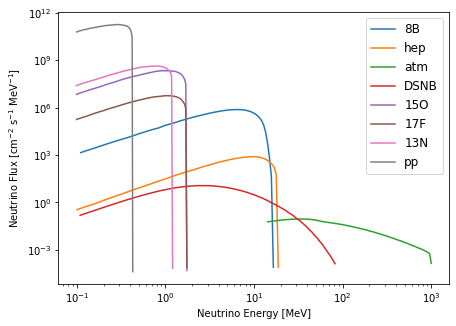

In [60]:
#https://arxiv.org/pdf/1604.03858.pdf
plt.figure(figsize=(7,5))

ER_list = np.logspace(-1, 2,100)

for flux_name in ["8B", "hep", "atm", "DSNB", "15O", "17F", "13N", "pp"]:
    fluxID = DMU.nu_source_list[flux_name] #This is a dictionary converting between the name of the flux and the index of the interpolation function
    Elist = np.logspace(np.log10(DMU.Enu_min[fluxID]), np.log10(DMU.Enu_max[fluxID]), 100) #The code also stores the min and max neutrino energies for each flux
    plt.loglog(Elist, DMU.neutrino_flux_list[fluxID](Elist), label=flux_name)

plt.legend(fontsize=12)

plt.xlabel(r"Neutrino Energy [MeV]")
plt.ylabel(r"Neutrino Flux [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]")

plt.show()

In [66]:
SiO2_molar_mass=60.07 #g/mol
MgSO4_7_H2O_molar_mass= 246.4746 #g/mol
NaCl_molar_mass=58.433 #g/mol

def Event_rate_nu_background(Enu,T,mineral,source):
  fluxID = DMU.nu_source_list[source]
  if mineral =='SiO2':
    R_per_target=CS_coherent_SiO2(T,Enu)*DMU.neutrino_flux_list[fluxID](Enu)  #s⁻¹MeV⁻²
    n_targets_density= (6.02*10**23)/SiO2_molar_mass #SiO2 targets/g
    R=n_targets_density*R_per_target#s⁻¹MeV⁻²g⁻¹
    return R
  if mineral =='MgSO4_7_H2O':
    R_per_target=CS_coherent_MgSO4_7_H2O(T,Enu)*DMU.neutrino_flux_list[fluxID](Enu)  #s⁻¹MeV⁻²
    n_targets_density= (6.02*10**23)/MgSO4_7_H2O_molar_mass #MgSO4 targets/g
    R=n_targets_density*R_per_target#s⁻¹MeV⁻²g⁻¹
    return R
  if mineral =='NaCl':
    R_per_target=CS_coherent_NaCl(T,Enu)*DMU.neutrino_flux_list[fluxID](Enu)  #s⁻¹MeV⁻²
    n_targets_density= (6.02*10**23)/NaCl_molar_mass #MgSO4 targets/g
    R=n_targets_density*R_per_target#s⁻¹MeV⁻²g⁻¹
    return R

def Recoil_spectrum_nu_background(T,mineral,source):
  fluxID = DMU.nu_source_list[source]
  Emin,Emax=DMU.Enu_min[fluxID], DMU.Enu_max[fluxID]
  Recoil=integrate.quad(lambda Enu: Event_rate_nu_background(Enu,T,mineral,source),Emin,Emax,epsabs=1.49e-20) #s⁻¹MeV⁻¹g⁻¹
  #print(Recoil)
  return Recoil #s⁻¹MeV⁻¹g⁻¹

In [73]:
T_step=0.0001
T_vec = np.logspace(-2, 2.3, 500, endpoint=True)#keV
nu_sources=["8B", "hep", "atm", "DSNB", "15O", "17F", "13N", "pp"]

Signal_Si02=[]
Signal_Si02_error=[]
Back_Si02=[]
Back_Si02_error=[]

for T in T_vec:
  R_aux,R_error_aux = Recoil_spectrum(T*10**(-3),'SiO2') # T in MeV
  Signal_Si02.append(R_aux)
  Signal_Si02_error.append(R_error_aux)

for i in range(len(nu_sources)):
  Back_Si02.append([])
  Back_Si02_error.append([])
  for T in T_vec:
    R_aux,R_error_aux = Recoil_spectrum_nu_background(T*10**(-3),'SiO2',nu_sources[i])
    Back_Si02[i].append(R_aux)
    Back_Si02_error[i].append(R_error_aux)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: IntegrationWarning: The integral is probably divergent, or slowly convergent.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


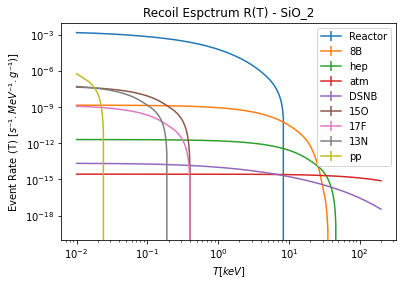

In [74]:
plt.errorbar(T_vec,Signal_Si02,yerr=Signal_Si02_error,label='Reactor')
for i in range(len(nu_sources)):
  plt.errorbar(T_vec,Back_Si02[i],yerr=Back_Si02_error[i],label='%s'%(nu_sources[i]))
plt.xlabel(r'$T[keV]$')
plt.ylabel(r'Event Rate (T) $[s⁻¹.MeV⁻¹.g⁻¹)]$')
plt.title("Recoil Espctrum R(T) - SiO_2")
plt.xscale('log')
plt.yscale('log')
plt.legend()

**G. Moroni , et al.**

* [Charge Coupled Devices for detection of coherent neutrino-nucleus scattering -Guillermo Fernandez Moroni, et al.](https://arxiv.org/abs/1405.5761) uses the following spectrum:

For $E>2MeV$, parametrized spectrum

$$\frac{dN}{dE_{\overline{\nu}}} = e^{a_0+a_1 E_{\overline{\nu}}+a_2 E_{\overline{\nu}}^2}$$

For 4 dominant fissile isotopes ($^{235}\textrm{U}$,$^{238}\textrm{U}$,$^{239}\textrm{Pu}$,$^{241}\textrm{Pu}$), with different fitted parameters $a_0$, $a_1$,$a_2$, and different contributions.

For $E<2MeV$ the values are tabulated.

Contribution of each isotope: $^{235}\textrm{U}$(∼ 56%), $^{238}\textrm{U}$(∼ 8%), $^{239}\textrm{Pu}$ (∼ 30%), and $^{241}\textrm{Pu}$ (∼ 6%). (From the paper and from C. Guinti)

Information extracted from:

https://authors.library.caltech.edu/32586/1/VOGprc81.pdf

https://authors.library.caltech.edu/6593/1/VOGprd89.pdf

**P.Huber, et al.**

https://arxiv.org/abs/1106.0687

Neutrino flux data can be found in: http://www1.phys.vt.edu/~pahuber/reactorfluxes/